In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data1=pd.read_csv("/content/drive/My Drive/gsr/data.csv")


In [4]:
data1.shape

(206940, 6)

In [5]:
data1.head()

,Unnamed: 0,0,1,2,3,4
0,0,2.173402,1.189203,0.935305,1.543539,2.771787
1,1,2.159191,1.183095,0.936134,1.517083,2.715917
2,2,2.254652,1.217000,0.959434,1.564887,2.776398
3,3,2.328341,1.270484,0.990674,1.629562,2.878108
4,4,2.439677,1.328956,1.046384,1.698458,3.034561


In [6]:
d=data1.loc[:][['0','1','2','3','4']]

In [7]:
d.shape

(206940, 5)

In [8]:
label1=pd.read_csv("/content/drive/My Drive/gsr/label.csv")
label1.shape

(206940, 2)

In [9]:
label1.head()

,Unnamed: 0,0
0,0,7.71
1,1,7.71
2,2,7.71
3,3,7.71
4,4,7.71


In [10]:
l=label1.loc[:]['0']

In [11]:
l.shape

(206940,)

In [12]:
x=d.values

In [13]:
y_val=l

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y_val)
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
import numpy as np
x = np.reshape(x, (x.shape[0],1,x.shape[1]))

In [16]:
x.shape

(206940, 1, 5)

In [17]:
y.shape

(206940, 10)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(165552, 1, 5)
(165552, 10)
(41388, 1, 5)
(41388, 10)


In [20]:
import tensorflow
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,BatchNormalization,Activation
model = Sequential()
model.add(LSTM(512, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(256,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(256,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(128,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(LSTM(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(10))

rmsprop =tensorflow.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08)
model.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
#adam = keras.optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         1060864   
_________________________________________________________________
batch_normalization (BatchNo (None, None, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         787456    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 256)         1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 256)         5

In [21]:
history = model.fit(x_train, y_train, epochs = 200, batch_size=300,validation_data= (x_test, y_test))

Epoch 1/200
552/552 [==============================] - 13s 24ms/step - loss: 1.2990 - accuracy: 0.1222 - val_loss: 0.0961 - val_accuracy: 0.1222
Epoch 2/200
552/552 [==============================] - 12s 22ms/step - loss: 0.5922 - accuracy: 0.1538 - val_loss: 0.1085 - val_accuracy: 0.3291
Epoch 3/200
552/552 [==============================] - 12s 22ms/step - loss: 0.2838 - accuracy: 0.1901 - val_loss: 0.0809 - val_accuracy: 0.3609
Epoch 4/200
552/552 [==============================] - 13s 23ms/step - loss: 0.1715 - accuracy: 0.2378 - val_loss: 0.0762 - val_accuracy: 0.3696
Epoch 5/200
552/552 [==============================] - 12s 22ms/step - loss: 0.1259 - accuracy: 0.2728 - val_loss: 0.0745 - val_accuracy: 0.3799
Epoch 6/200
552/552 [==============================] - 12s 22ms/step - loss: 0.1020 - accuracy: 0.3093 - val_loss: 0.0730 - val_accuracy: 0.3855
Epoch 7/200
552/552 [==============================] - 12s 22ms/step - loss: 0.0883 - accuracy: 0.3355 - val_loss: 0.0720 - val_ac

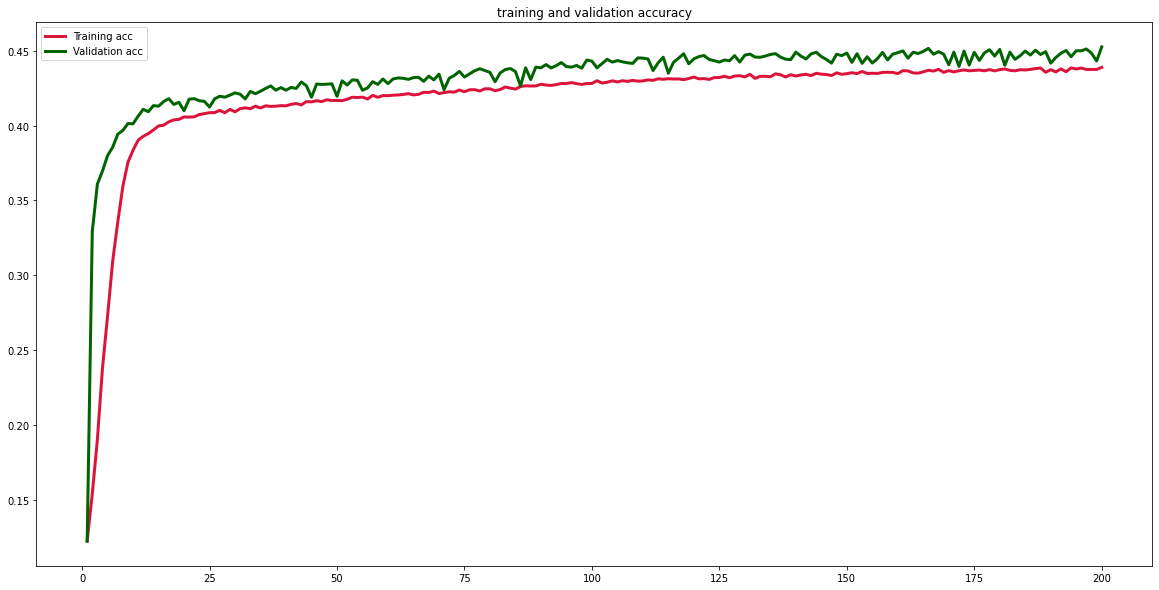

In [23]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure(figsize=(20,10))
plt.plot(epochs[0:600],acc[0:600],'crimson',label='Training acc',linewidth=3)
plt.plot(epochs[0:600],val_acc[0:600],'darkgreen',label='Validation acc',linewidth=3)
plt.title("training and validation accuracy")
plt.legend()
# plt.savefig("/content/drive/My Drive/deap_egg_final/accuracy_resilt_2.png")
plt.savefig("/content/drive/My Drive/gsr/accuracy_resilt.png")

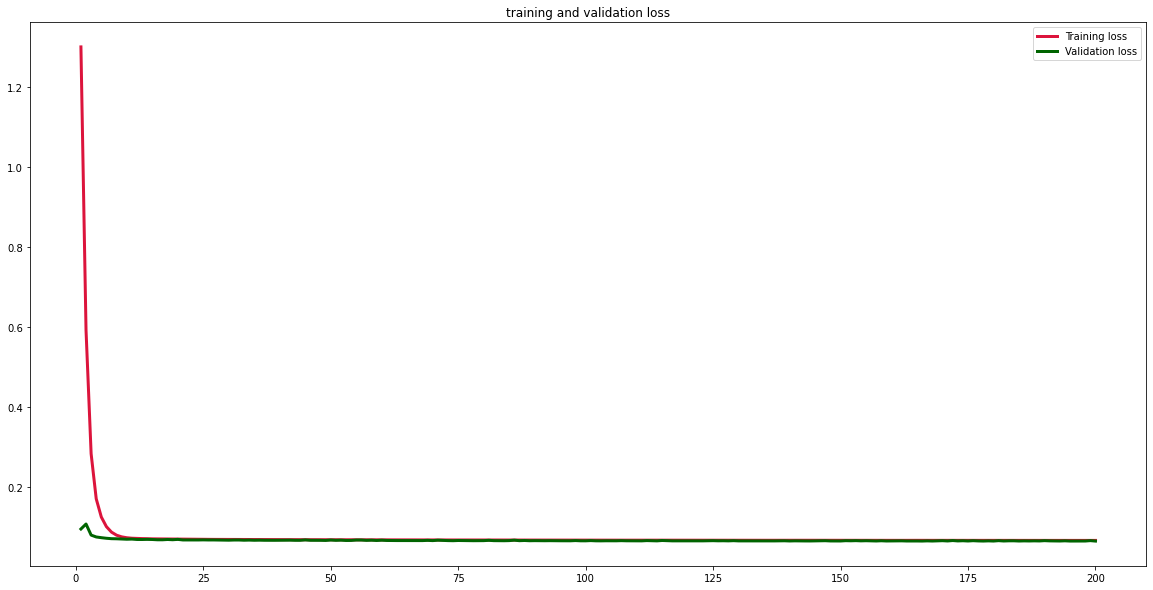

In [24]:
plt.figure(figsize=(20,10))

plt.plot(epochs[0:600],loss[0:600],'crimson',label='Training loss',linewidth=3)
plt.plot(epochs[0:600],val_loss[0:600],'darkgreen',label='Validation loss',linewidth=3)
plt.title("training and validation loss")
plt.legend()
plt.savefig("/content/drive/My Drive/gsr/loss_2.jpg")
plt.show()

In [25]:
model.save("/content/drive/My Drive/gsr/gsr_0_valance.h5")

In [26]:
model.save("/content/drive/My Drive/gsr/gsr_0_valance")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/gsr/gsr_0_valance/assets


In [28]:
from contextlib import redirect_stdout

with open('/content/drive/My Drive/gsr/modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()